# Zad 1

In [331]:
from random import uniform
import matplotlib.pyplot as plt
from time import time
import numpy as np

In [332]:
def add(tab):
    s = np.float32(0)
    for x in tab:
        s += x
    return s

def add_recu(tab):
    n = len(tab)
    if n == 0:
        return 0
    elif n == 1:
        return tab[0]
    elif n == 2:
        return tab[0] + tab[1]
    n //= 2
    return add_recu(tab[:n]) + add_recu(tab[n:])

def kahan(tab):
    s = np.float32(0)
    error = np.float32(0)
    for x in tab:
        y = x - error
        temp = s + y
        error = (temp - s) - y
        s = temp
    return s

def count_time(func, *args, **kwargs):
    start_time = time()
    func(*args, **kwargs)
    return time() - start_time

In [333]:
N = 10**7
v = round(uniform(0.1, 0.9), 6)
# v = 0.11111111  # zad 1.7
correct_sum = v*N
v = np.float32(v)
correct_sum = np.float32(correct_sum)
tab = [v for _ in range(int(N))]
sum_left_to_right = add(tab)
print("v =", v)
print("correct_sum:      ", correct_sum)
print("sum_left_to_right:", sum_left_to_right)

v = 0.748993
correct_sum:       7489930.0
sum_left_to_right: 6398058.5


In [334]:
wrong_sum = sum_left_to_right
error_abs = abs(correct_sum - wrong_sum)  # bląd bezwzględny
error_rel = error_abs / correct_sum       # błąd względny
print("error_abs:", error_abs)
print("error_rel:", error_rel)

error_abs: 1091871.5
error_rel: 0.1457786


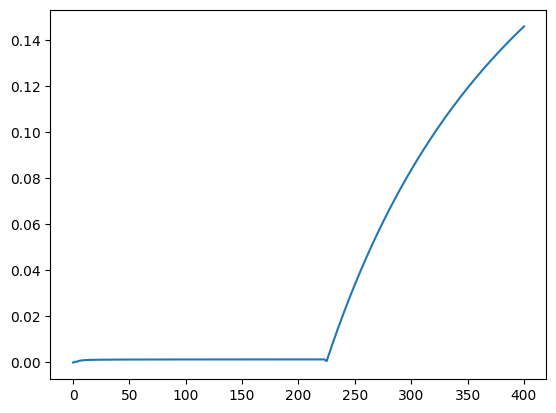

In [335]:
error_abs_tab = [0]
steps = [0]
current_val = np.float32(0)
for i in range(N):
    current_val += tab[i]
    if (i + 1) % 25000 == 0:
        steps.append((i+1)//25000)
        correct_val = (i+1) * v
        current_abs_error = abs(correct_val - current_val)
        # current_abs_error = correct_val - current_val
        # print(current_abs_error)
        error_abs_tab.append(current_abs_error / correct_val)

plt.plot(steps,error_abs_tab)
plt.show()

In [336]:
sum_recu = add_recu(tab)
error_abs_reku = abs(correct_sum - sum_recu)
error_rel_reku = error_abs_reku / correct_sum

In [337]:
sum_kahan = kahan(tab)
error_abs_kahan = abs(sum_kahan - correct_sum)
error_rel_kahan = error_abs_kahan / correct_sum

In [338]:
print("v =", v, "\n")
print("correct_sum:  ", correct_sum)
print("wrong_sum:    ", wrong_sum)
print("sum_recu:     ", sum_recu)
print("                absolut        relative")
print("errors_normal:", error_abs, "   ", error_rel)
print("errors_reku:  ", error_abs_reku, "        ", error_rel_reku)
print("errors_kahan: ", error_abs_kahan, "        ", error_rel_kahan)

v = 0.748993 

correct_sum:   7489930.0
wrong_sum:     6398058.5
sum_recu:      7489930.0
                absolut        relative
errors_normal: 1091871.5     0.1457786
errors_reku:   0.0          0.0
errors_kahan:  0.0          0.0


In [339]:
t1 = count_time(add, tab)
t2 = count_time(add_recu, tab)
t3 = count_time(kahan, tab)

print("v =", v, "\n")
print("time of normal add func:", t1, "s")
print("time of reku add func:  ", t2, "s")
print("time of kahan add func: ", t3, "s")


v = 0.748993 

time of normal add func: 0.6248171329498291 s
time of reku add func:   3.643826723098755 s
time of kahan add func:  2.619148015975952 s
